## Figure 1: Response functions

This notebook generates response function plots for Figure 1 of Hogan and Schlenker (2023). It also reproduces Table 1, which quantifies the impacts of harmful and beneficial temperature days on yields across climate data sets.

In [5]:
suppressMessages(here::i_am('R_analysis/notebooks/Fig1_response_functions.ipynb'))
CODE = here::here()
source(glue::glue("{CODE}/R_analysis/init.R"))

In [6]:
local_load('analysis/clean_data.R')
test = load_panel(source='prism', crop='corn')

In [76]:
# Generate dataframes with evaluated response functions
sources = c("prism", "era5", "gmfd")
crops = c("corn", "soy")
regression_args = list()
centering = 10

plot_df = generate_response_function_plot_df(
    year_min, year_max,
    growing_season_min, growing_season_max,
    GDD_lower, KDD_lower_list,
    temp_lower, temp_upper,
    centering, regression_args,
    sources, crops
)

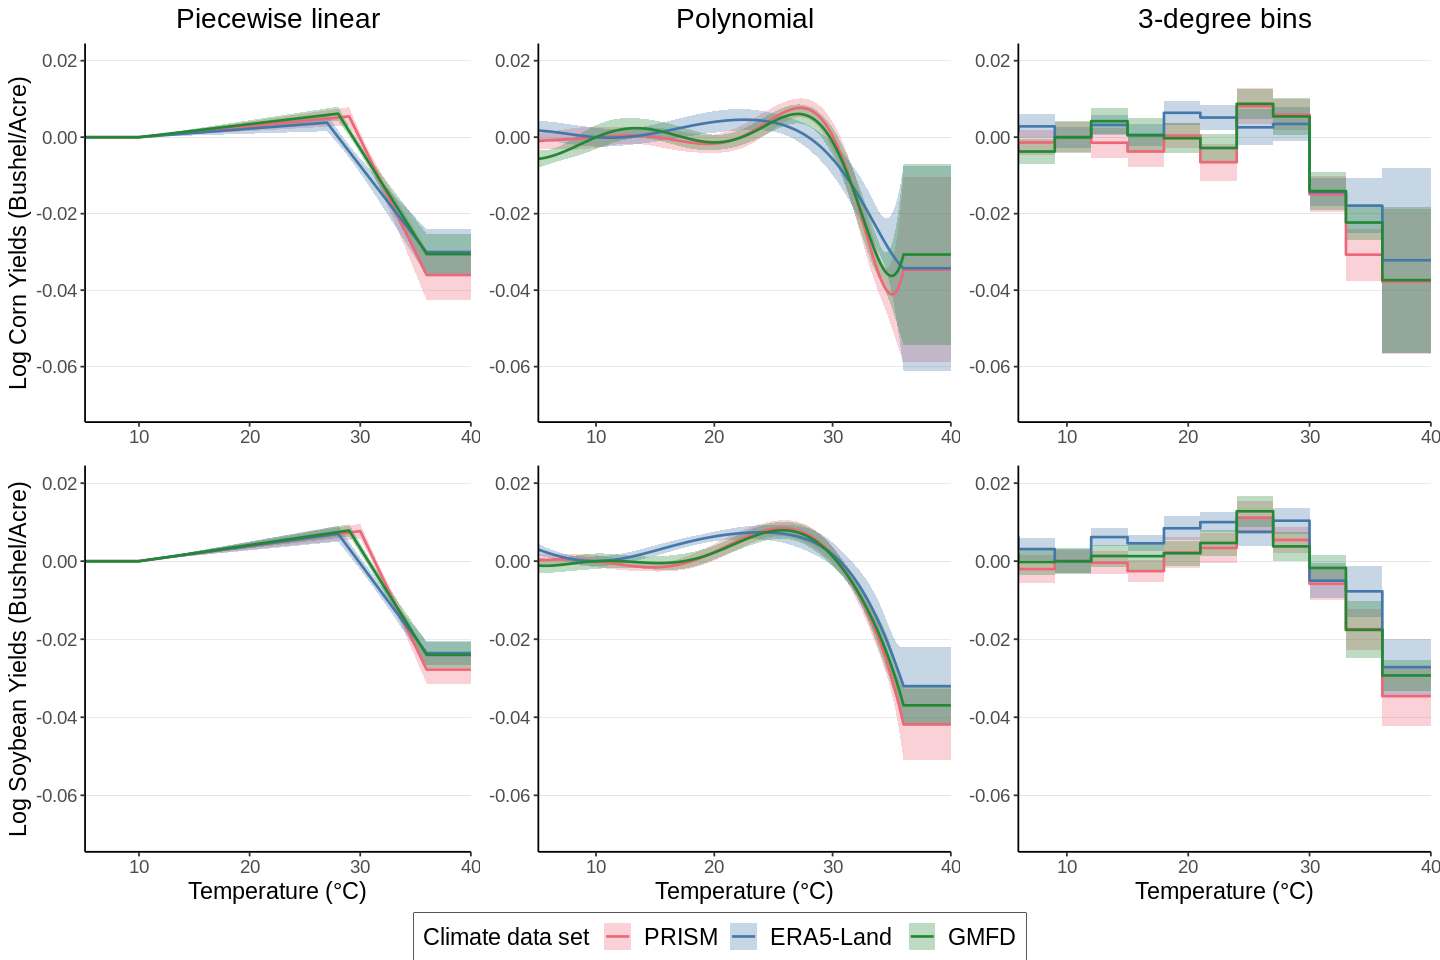

In [77]:
options(repr.plot.width=12, repr.plot.height=8)
plot = plot_response_function_matrix(plot_df)
plot

In [8]:
ggsave(glue("{CODE}/results/figures/Fig1_response_functions.pdf"), plot, width=12, height=8)

### Table 1

In [78]:
tab = temperature_sensitivity_table(
    year_min, year_max,
    growing_season_min, growing_season_max,
    GDD_lower, KDD_lower_list,
    temp_lower, temp_upper
)
print(tab, type='latex')

% latex table generated in R 4.3.0 by xtable 1.8-4 package
% Mon Aug 21 14:43:15 2023
\begin{table}[ht]
\centering
\begin{tabular}{rllllll}
  \hline
 & crop & temp & variable & prism & era5 & gmfd \\ 
  \hline
1 & corn & hot & b & -3.77 & -3.22 & -3.74 \\ 
  2 & corn & hot & se & (0.98) & (1.20) & (1.05) \\ 
  3 & corn & warm & b & 0.81 & 0.64 & 0.87 \\ 
  4 & corn & warm & se & (0.29) & (0.16) & (0.23) \\ 
  5 & soy & hot & b & -3.46 & -2.72 & -2.93 \\ 
  6 & soy & hot & se & (0.38) & (0.32) & (0.23) \\ 
  7 & soy & warm & b & 1.12 & 1.04 & 1.28 \\ 
  8 & soy & warm & se & (0.23) & (0.20) & (0.19) \\ 
   \hline
\end{tabular}
\end{table}
